<div id="container" style="position:relative;">
<div style="float:left"><h1> SENTIMENT ANALYSIS THE
CORONAVIRUS TWEETS
    USING NLP 
    </h1></div>


In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#NLTK Packages
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helaleh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Balancing the dataset
* First,I 've used the imbalanced dataset to train the model for label prediction. Although I got pretty good test score but my model was able to predict the natural polarity tweets.In order to balance the initial dataset, I used another tweets dataset.

In [126]:
# reading the another tweet dataset to add positive and negative tweets
df=pd.read_csv('train_tweet.csv',engine='python')

In [127]:
df=df.iloc[:,0:2]

In [128]:
df.head()

,Texts,label
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0


### Reading the initial negative tweets:

In [129]:
df_neg=pd.read_csv('processedNegative.csv').T.reset_index()

In [130]:
df_neg.rename(mapper={'index':'Tweets'},axis=1,inplace=True)

In [131]:
df_neg['label']=0 # assigning the negative tweets to 0

In [132]:
df_neg.head()

,Tweets,label
0,How unhappy some dogs like it though,0
1,talking to my over driver about where I'm goin...,0
2,Does anybody know if the Rand's likely to fall...,0
3,I miss going to gigs in Liverpool unhappy,0
4,There isnt a new Riverdale tonight ? unhappy,0


### Adding more negtive tweets:

In [133]:
df_neg_add=df[df['label']==0][0:453] # adding 453 negative tweets

In [134]:
df_neg_add.reset_index(inplace=True)

In [135]:
df_neg_add.drop('index',axis=1,inplace=True)

In [136]:
df_neg_add.rename(mapper={'Texts':'Tweets'},axis=1,inplace=True)

In [137]:
df_neg_add.head()

,Tweets,label
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,.. Omgaga. Im sooo im gunna CRy. I'...,0
3,i think mi bf is cheating on me!!! ...,0
4,or i just worry too much?,0


In [138]:
df_negative=pd.concat([df_neg,df_neg_add],axis=0)# joing the dataframes

In [140]:
df_negative.shape

(1570, 2)

 ### Reading the initial positive tweets:

In [141]:
df_pos=pd.read_csv('processedPositive.csv').T.reset_index()

In [142]:
df_pos.rename(mapper={'index':'Tweets'},axis=1,inplace=True)

In [143]:
df_pos['label']=1 # assigning the positive tweets to 1

In [144]:
df_pos.head()

,Tweets,label
0,An inspiration in all aspects: Fashion,1
1,fitness,1
2,beauty and personality. :)KISSES TheFashionIcon,1
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1
4,Beautiful album from the greatest unsung guit...,1


### Adding more positive tweets:

In [145]:
df_pos_new=df[df['label']==1][0:384]

In [146]:
df_pos_new.reset_index(inplace=True)

In [147]:
df_pos_new.drop('index',axis=1,inplace=True)

In [148]:
df_pos_new.rename(mapper={'Texts':'Tweets'},axis=1,inplace=True)

In [149]:
df_pos_new.shape

(384, 2)

In [150]:
df_positive=pd.concat([df_pos,df_pos_new],axis=0) # joining the dataframes to have 1570

In [151]:
df_positive.shape

(1570, 2)

 ### Reading the initial natural tweets:

In [152]:
df_nut=pd.read_csv('processedNeutral.csv').T.reset_index()

In [153]:
df_nut.rename(mapper={'index':'Tweets'},axis=1,inplace=True)

In [154]:
df_nut['label']=2

In [155]:
df_nut.head()

,Tweets,label
0,Pak PM survives removal scare,2
1,but court orders further probe into corruptio...,2
2,Supreme Court quashes criminal complaint again...,2
3,Art of Living's fights back over Yamuna floodp...,2
4,livid.,2


### Joining all dataframes together

In [156]:
df_j = pd.concat([df_negative,df_positive,df_nut],ignore_index=True)

In [157]:
df_j

,Tweets,label
0,How unhappy some dogs like it though,0
1,talking to my over driver about where I'm goin...,0
2,Does anybody know if the Rand's likely to fall...,0
3,I miss going to gigs in Liverpool unhappy,0
4,There isnt a new Riverdale tonight ? unhappy,0
...,...,...
4705,IDFC official Vikram Limaye,2
4706,former captain Diana Edulji are others in pan...,2
4707,Supreme Court names former CAG as head of 4-me...,2
4708,Court summons CM suspended BJP MP as accused i...,2


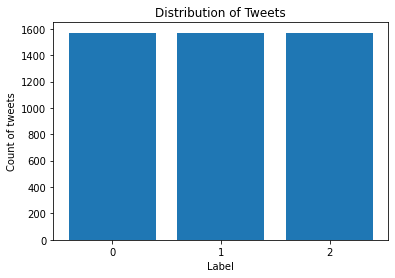

In [158]:
values, counts= np.unique(df_j['label'], return_counts=True)
plt.figure()
plt.bar(values, counts,tick_label=[0,1,2])
plt.title('Distribution of Tweets')
plt.xlabel('Label')
plt.ylabel('Count of tweets')
plt.show()

### Defining the Cleaning function to clean the tweets:
- #removing the URL Http
- removing the hashtags and @, numbers, characters

In [159]:
import re 
def function_clean_tweet(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    # Convert to lowercase
    text=re.sub(r"http\S+","",text)
    text = re.sub("'ll", " will", text)
    text = re.sub("'ve", " have", text)
    text = re.sub("n't", " not", text)
    text = re.sub("'d", " would", text)
    text = re.sub("'re", " are", text)
    text = re.sub("i'm", "i am", text)
    text = re.sub("it's", "it is", text)
    text = re.sub("she's", "she is", text)
    text = re.sub("he's", "he is", text)
    text = re.sub("here's", "here is", text)
    text = re.sub("that's", "that is", text)
    text = re.sub("there's", "there is", text)
    text = re.sub("what's", "what is", text)
    text = re.sub("who's", "who is", text)
    text = re.sub("'s", "", text)
    # Handling slang words
    text = re.sub(r"\btmrw\b", "tomorrow", text)
    text = re.sub(r"\bur\b", "your", text)
    text = re.sub(r"\burs\b", "yours", text)
    text = re.sub(r"\bppl\b", "people", text)
    text = re.sub(r"\byrs\b", "years", text)
    # Handling acronyms
    text = re.sub(r"\b(rt)\b", "retweet", text)
    text = re.sub(r"\b(btw)\b", "by the way", text)
    text = re.sub(r"\b(asap)\b", "as soon as possible", text)
    text = re.sub(r"\b(fyi)\b", "for your information", text)
    text = re.sub(r"\b(tbt)\b", "throwback thursday", text)
    text = re.sub(r"\b(tba)\b", "to be announced", text)
    text = re.sub(r"\b(tbh)\b", "to be honest", text)
    text = re.sub(r"\b(faq)\b", "frequently asked questions", text)
    text = re.sub(r"\b(icymi)\b", "in case you missed it", text)
    text = re.sub(r"\b(aka)\b", "also known as", text)
    text = re.sub(r"\b(ama)\b", "ask me anything", text)
    return text

In [160]:
function_clean_tweet("You're a the only one who can see this cause no one else is following me this is for you because you're pretty awesome")

'You are a the only one who can see this cause no one else is following me this is for you because you are pretty awesome'

In [161]:
# applying the cleaning function to tweets columns
df_j['Tweets'] = df_j['Tweets'].apply(lambda text: function_clean_tweet(text))

In [162]:
#Splitting the data to both train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y=df_j["label"]
X=df_j["Tweets"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [163]:
X_train.shape

(3768,)

### Defining the tokenizer to tokenize the tweets:

In [164]:
import string
#nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):

    listofwords = sentence.strip().split()# to remove any space from beginning and the end of text
    listof_words = []    
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            for punctuation_mark in string.punctuation:
                word = word.replace(punctuation_mark, '').lower()
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

In [165]:
my_tokenizer(' - top engaged members this week happy ')

['top', 'engaged', 'members', 'week', 'happy']

## Vectorizing the tweets by using TF_IDF vectorizer:

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [182]:
vect = TfidfVectorizer(min_df=0.001,tokenizer=my_tokenizer,ngram_range=(1,3)).fit(X_train)
X_train1 = vect.transform(X_train)
X_test1=vect.transform(X_test)

In [183]:
new_df = pd.DataFrame(columns=vect.get_feature_names(), data=X_train1.toarray())
new_df

,a,able,absorbed,absorbed im,absorbed im going,account,accused,across,action,actually,...,yoongi,yoongi unhappy,york,york since,york since trump,you,youngjae,younhappy,youtube,yoyou
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3764,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3765,0.0,0.0,0.0,0.0,0.0,0.651873,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3766,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
#counting most repetitive words 
word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vect.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                     "count":word_counts})
words_df.sort_values(by="count",ascending=False).head(10)

,word,count
1201,unhappy,188.378075
467,happy,168.081572
1238,want,44.383349
525,im,42.299998
1099,thanks,42.257793
236,d,40.413458
710,more,36.986834
696,miss,36.914578
403,get,35.215867
1147,today,34.084364


## Logistic Classification

In [289]:
# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train1, y_train)
# Training score

print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score on training set: 0.8845541401273885
Score on test set: 0.7866242038216561


In [190]:
# trying to see the coeffs and feature wors
coefficients = logreg.coef_
indices = coefficients.argsort()[0]
np.array(vect.get_feature_names())[indices[:20]]

array(['happy', 'd', 'crying joy', 'india', 'smile', 'govt', 'joy',
       'says', 'thanks', 'court', 'calcutta', 'bjp', 'minister', 'more',
       'modi', 'also', 'cm', 'first', 'bengal', 'ban'], dtype='<U26')

In [191]:
np.array(vect.get_feature_names())[indices[-20:]]

array(['fun', 'thing', 'younhappy', 'angry', 'yeah', 'never', 'head',
       'like', 'sucks', 'night', 'fuck', 'ca', 'me', 'feel', 'im', 'want',
       'miss', 'crying', 'sad', 'unhappy'], dtype='<U26')

In [192]:
# Checking the confusion_matrix
from sklearn.metrics import confusion_matrix
preds = logreg.predict(X_test1)
con_mat = confusion_matrix(y_test,preds)
con_mat

array([[244,  40,  47],
       [ 30, 215,  66],
       [ 10,   8, 282]], dtype=int64)

In [174]:
# making the confusion matrix a bit more clear
df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1','Predicted 2'],
                 index = ['True 0','True 1','True 2'])
df_con_mat

,Predicted 0,Predicted 1,Predicted 2
True 0,244,40,47
True 1,30,215,66
True 2,10,8,282


In [175]:
from sklearn.metrics import classification_report
report = classification_report(y_test, preds, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.859155,0.737160,0.793496,331.000000
1,0.817490,0.691318,0.749129,311.000000
2,0.713924,0.940000,0.811511,300.000000
accuracy,0.786624,0.786624,0.786624,0.786624
macro avg,0.796856,0.789493,0.784712,942.000000
weighted avg,0.799148,0.786624,0.784585,942.000000


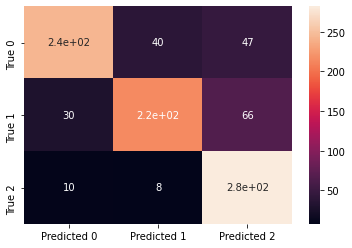

In [176]:
import seaborn as sn
plt.figure()
sn.heatmap(df_con_mat, annot=True)

In [177]:
from sklearn.model_selection import cross_val_score

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train1)
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

In [179]:
logreg.fit(X_train_scaled, y_train)
# Training score

print(f"Score on training set: {logreg.score(X_train_scaled,y_train)}")
print(f"Score on test set: {logreg.score(X_test_scaled,y_test)}")

C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score on training set: 0.9402866242038217
Score on test set: 0.7399150743099787


C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [84]:
new_df.shape

(3768, 1302)

# Grid search for logistic model:

In [213]:
from sklearn.pipeline import Pipeline
estimators = [('classifier',LogisticRegression())]
pipe = Pipeline(estimators)

In [236]:
from sklearn.model_selection import GridSearchCV
params = {'classifier__penalty' : ['l1','l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
grid_search = GridSearchCV(pipe, param_grid=params,cv=8)

In [237]:
fitted_search = grid_search.fit(X_train1, y_train)

C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [239]:
fitted_search.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=4.281332398719396, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [240]:
fitted_search.best_score_

0.8128980891719745

In [241]:
logreg1 = LogisticRegression(C=4.281332398719396, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False)
logreg1.fit(X_train1, y_train)
# Training score

print(f"Score on training set: {logreg1.score(X_train1,y_train)}")
print(f"Score on test set: {logreg1.score(X_test1,y_test)}")

C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score on training set: 0.9102972399150743
Score on test set: 0.7791932059447984


# KNN model

In [238]:
from sklearn.neighbors import KNeighborsClassifier # I didn't sample data for this part please don't run:)!

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_scaled, y_train)
print(f"Test score: {KNN_model.score(X_test_scaled,y_test)}")

Test score: 0.638004246284501


# Decision tree

In [242]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train1, y_train)
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train1,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test1,y_test)}")

The TRAIN classification accuracy is:  0.9514331210191083
The TEST classification accuracy is:  0.7314225053078556


## Validation set

In [243]:
X_train_sa, X_val, y_train_sa, y_val = train_test_split(X_train1, y_train, test_size=0.2, random_state=1)

In [244]:
from sklearn.tree import DecisionTreeClassifier # don't run this please
dt_train=[]
dt_test=[]
depth=[]
for i in range(1,100):
    D_model = DecisionTreeClassifier(max_depth=i)
    D_model.fit(X_train_sa, y_train_sa)
    dt_train.append(D_model.score(X_train_sa, y_train_sa))
    dt_test.append(D_model.score(X_val, y_val))
    depth.append(i)

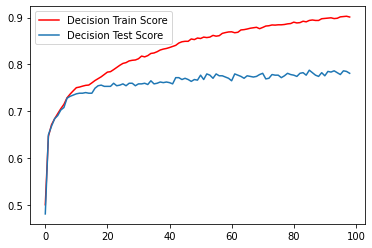

In [245]:
plt.figure()
plt.plot(dt_train,color='red',label='Decision Train Score')
plt.plot(dt_test,label='Decision Test Score')
plt.legend()
plt.show()

In [246]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(D_model, X_train1,y_train, cv = 8)
print(scores)

[0.78601695 0.78813559 0.79449153 0.8089172  0.76645435 0.76008493
 0.79787234 0.79957356]


In [247]:
print(f"Average Score:{np.mean(scores)}")

Average Score:0.7876933055716996


In [248]:
from sklearn.pipeline import Pipeline
estimators = [('normalise', StandardScaler(with_mean=False)),
              ('D_model', DecisionTreeClassifier()),
              ]
pipe = Pipeline(estimators)

In [249]:
from sklearn.model_selection import GridSearchCV
params = {'D_model__max_depth': [3,5,6,7,8,10,12],
           'D_model__min_samples_leaf':[3,4,6,8,9,10]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

In [250]:
fitted_search = grid_search.fit(X_train1, y_train)

In [255]:
fitted_search.best_estimator_

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('D_model',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=12, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=8, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [290]:
DT_model1 = DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=12, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=8, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best')
DT_model1.fit(X_train1, y_train)
print(f"The TRAIN classification accuracy is:  {DT_model1.score(X_train1,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model1.score(X_test1,y_test)}")

The TRAIN classification accuracy is:  0.73328025477707
The TEST classification accuracy is:  0.697452229299363


# Random Forest model

In [256]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier()
my_random_forest.fit(X_train1, y_train)
print(f"Random Forest: {my_random_forest.score(X_train1, y_train)}")
print(f"Random Forest: {my_random_forest.score(X_test1, y_test)}")

C:\Users\helaleh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: 0.9445329087048833
Random Forest: 0.7611464968152867


In [257]:
estimators2 = [('classifier',RandomForestClassifier())]
pipe_rand = Pipeline(estimators2)

In [258]:
params_rand = {'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
grid_search_rand = GridSearchCV(pipe_rand, param_grid=params_rand,cv=5)

In [259]:
fitted_search_rand = grid_search_rand.fit(X_train1, y_train)

In [261]:
fitted_search_rand.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=6, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=80, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [262]:
my_random_forest1 = RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=6, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=80, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
my_random_forest1.fit(X_train1, y_train)
print(f"Random Forest: {my_random_forest1.score(X_train1, y_train)}")
print(f"Random Forest: {my_random_forest1.score(X_test1, y_test)}")

Random Forest: 0.9514331210191083
Random Forest: 0.7823779193205945


In [263]:
preds_rand = my_random_forest1.predict(X_test1)
con_mat_rand = confusion_matrix(y_test,preds_rand)
con_mat_rand

array([[248,  44,  39],
       [ 38, 217,  56],
       [ 16,  12, 272]], dtype=int64)

# XGBoost

In [264]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train_scaled, y_train)
print(f"XG Boost score: {XGB_model.score(X_test_scaled, y_test)}")
#print(f"XG Boost score: {XGB_model.score(X_train_scaled, y_train)}")

XG Boost score: 0.7632696390658175


# Naive bayes

In [291]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
Mmodel =MultinomialNB()
# Fit our model
Mmodel.fit(X_train1, y_train)
print(f"Naive bayes score: {Mmodel.score(X_test1, y_test)}")
print(f"Naive bayes score: {Mmodel.score(X_train1, y_train)}")


Naive bayes score: 0.7791932059447984
Naive bayes score: 0.8723460721868365


# Predicting the label for coronavirus tweets:

In [193]:
#reading the dataset
df_tweet=pd.read_csv('New_Corona_Tweets.csv',encoding= 'unicode_escape')

In [194]:
#cleaning the tweets
df_tweet['Tweets'] = df_tweet['Tweets'].apply(lambda text: function_clean_tweet(text))

In [195]:
X_pred=df_tweet["Tweets"]

In [196]:
#vectorizing tweets by using TIF_DF vectorizer
X_pred1=vect.transform(X_pred)

In [197]:
df_tweet['prediction'] = logreg.predict(X_pred1)

In [198]:
df_tweet

,Tweets,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,prediction
0,Watch what happened at in broadcast: LIVE: ...,NaN,NaN,NaN,NaN,NaN,2
1,"And yet, we are relying on science to identif...",NaN,NaN,NaN,NaN,NaN,0
2,"""The government is useless. They should close ...",NaN,NaN,NaN,NaN,NaN,2
3,Lockdown in Wuhan: Instructions on how to stop...,NaN,NaN,NaN,NaN,NaN,0
4,"Hey, still proud of sending millions of masks...",NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...
19995,Due to severe of in China government was kill...,NaN,NaN,NaN,NaN,NaN,2
19996,Necessity is the mother of ADOPTION.,NaN,NaN,NaN,NaN,NaN,2
19997,U do not u take a trip to to find out the tr...,NaN,NaN,NaN,NaN,NaN,2
19998,A newly-built hospital in Wuhan has taken in i...,NaN,NaN,NaN,NaN,NaN,1


In [199]:
df_tweet.dropna(axis=1,inplace=True)

In [200]:
df_tweet

,Tweets,prediction
0,Watch what happened at in broadcast: LIVE: ...,2
1,"And yet, we are relying on science to identif...",0
2,"""The government is useless. They should close ...",2
3,Lockdown in Wuhan: Instructions on how to stop...,0
4,"Hey, still proud of sending millions of masks...",1
...,...,...
19995,Due to severe of in China government was kill...,2
19996,Necessity is the mother of ADOPTION.,2
19997,U do not u take a trip to to find out the tr...,2
19998,A newly-built hospital in Wuhan has taken in i...,1


In [266]:
df_tweet['prediction_random'] = my_random_forest1.predict(X_pred1)

In [267]:
df_tweet

,Tweets,prediction,prediction_random
0,Watch what happened at in broadcast: LIVE: ...,2,2
1,"And yet, we are relying on science to identif...",0,0
2,"""The government is useless. They should close ...",2,2
3,Lockdown in Wuhan: Instructions on how to stop...,0,1
4,"Hey, still proud of sending millions of masks...",1,1
...,...,...,...
19995,Due to severe of in China government was kill...,2,2
19996,Necessity is the mother of ADOPTION.,2,2
19997,U do not u take a trip to to find out the tr...,2,2
19998,A newly-built hospital in Wuhan has taken in i...,1,1


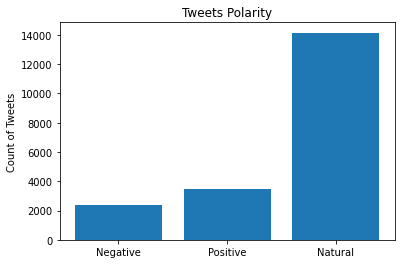

In [294]:
values, counts= np.unique(df_tweet['prediction'], return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(values, counts,tick_label=['Negative','Positive','Natural'])
plt.title('Tweets Polarity')
#plt.xlabel('Labels')
plt.ylabel('Count of Tweets')
plt.show()

In [295]:
values,counts

(array([0, 1, 2], dtype=int64), array([ 2383,  3463, 14154], dtype=int64))

In [278]:
df_tweet['Tweets'][3]

'Lockdown in Wuhan: Instructions on how to stop the spread of the coronavirus blare out over the loudspeakers. A haunting sound in what looks like a ghost town.   Cases of the virus worldwide.   Fatalities.     '

# exporting the table

In [124]:
#df_tweet.to_csv(r'labeled_corona.csv')

# Predicting the input string

In [288]:
input_string = "ali me unhappy"
print("\nPrediction on an input string: " + input_string)
print(logreg.predict(vect.transform([function_clean_tweet(input_string)])))
print(my_random_forest1.predict(vect.transform([function_clean_tweet(input_string)])))



Prediction on an input string: ali me unhappy
[0]
[0]
